Aqui importei os pacotes pandas e matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Neste trecho de código em Python usei a biblioteca pandas para ler um arquivo CSV proposto e remover linhas duplicadas.

In [5]:
data = pd.read_csv('googleplaystore.csv').drop_duplicates()

Nesta parte do código, é  importado os dados de um arquivo, limpa a coluna de instalações, selecione os aplicativos mais populares e os exibidos em um gráfico de barras. É um ótimo exemplo de manipulação de dados e visualização com pandase matplotlib.

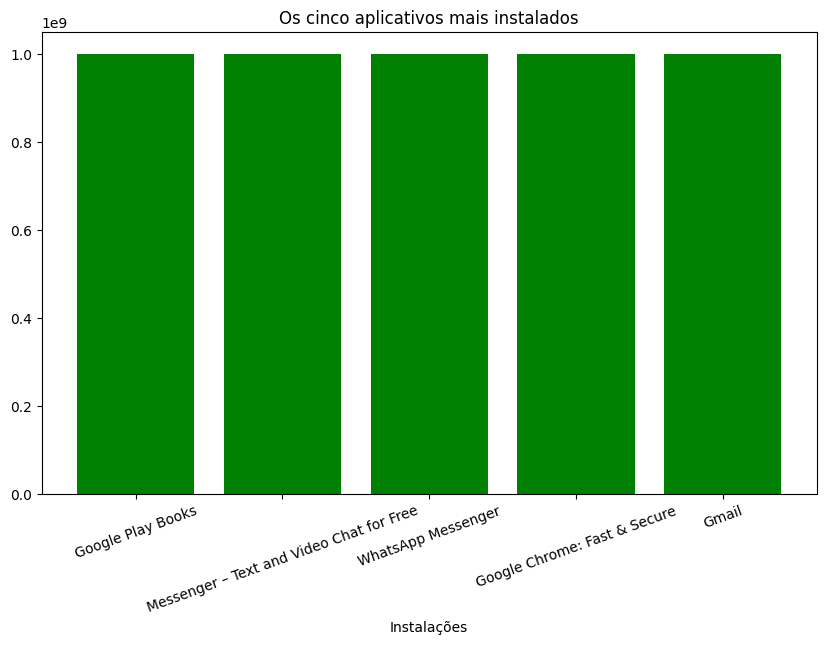

In [6]:
data['Installs'] = data['Installs'].astype(str)
data = data[data['Installs'].str.contains(r'^\d', na=False)]
data['Installs'] = pd.to_numeric(data['Installs'].str.replace(r'[+,]','',regex=True), errors='coerce')
maismais = data.nlargest(5, 'Installs')[['App', 'Installs']]

plt.figure(figsize=(10, 6))
plt.bar(maismais['App'], maismais['Installs'], color='green')
plt.xlabel('Instalações')
plt.title('Os cinco aplicativos mais instalados')

plt.xticks(rotation=20)
plt.show()


Aqui é feito o cálculo da frequência das categorias e criação do gráfico de pizza.

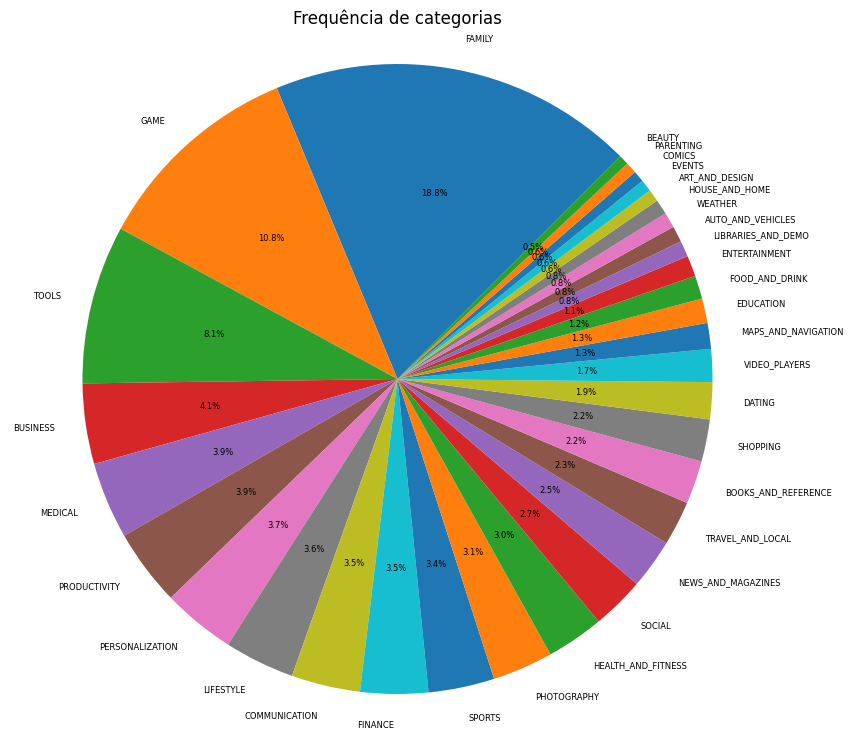

In [15]:
frequencia_de_categorias = data['Category'].value_counts()
plt.figure(figsize=(10, 9))
plt.pie(frequencia_de_categorias, labels=frequencia_de_categorias.index, autopct='%1.1f%%', startangle=45, textprops={'fontsize': 6})
plt.title('Frequência de categorias')
plt.axis('equal')
plt.show()

nesta parte podemos ver a conversão da coluna price para valores numéricos, e encontrar o item mais caro.

In [8]:
data['Price'] = pd.to_numeric(data['Price'].str.replace('$', ''), errors='coerce')
mais_caro = data.loc[data['Price'].idxmax()]
print(mais_caro)

App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object


Aqui podemos ver a filtragem dos dados para encontrar aplicativos recomendados para maiores de 17 anos, e contagem dos aplicativos únicos .

In [9]:
idade16mais = data[data['Content Rating'] == 'Mature 17+'].drop_duplicates(subset=['App']).shape[0]
print(f'maiores de 17= {idade16mais}')

maiores de 17= 393


podemos observar a conversão da coluna de avaliações para valores numéricos , a remoção de aplicativos duplicados e a seleção dos 10 aplicativos mais comentados.

In [10]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
dezmais_comentados = data.drop_duplicates(subset=['App']).nlargest(10, 'Reviews')[['App', 'Reviews']]
print(dezmais_comentados)

                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


In [11]:
installs_reviews = data.groupby('Installs')['Reviews'].mean().reset_index()
print(installs_reviews)

      Installs       Reviews
0            0  0.000000e+00
1            1  2.985075e-01
2            5  5.365854e-01
3           10  1.088312e+00
4           50  2.382353e+00
5          100  5.443662e+00
6          500  1.228049e+01
7         1000  3.772472e+01
8         5000  1.001514e+02
9        10000  3.459255e+02
10       50000  9.841814e+02
11      100000  3.403816e+03
12      500000  9.880915e+03
13     1000000  3.309948e+04
14     5000000  1.033027e+05
15    10000000  3.687215e+05
16    50000000  1.250281e+06
17   100000000  4.685775e+06
18   500000000  9.828022e+06
19  1000000000  2.016841e+07


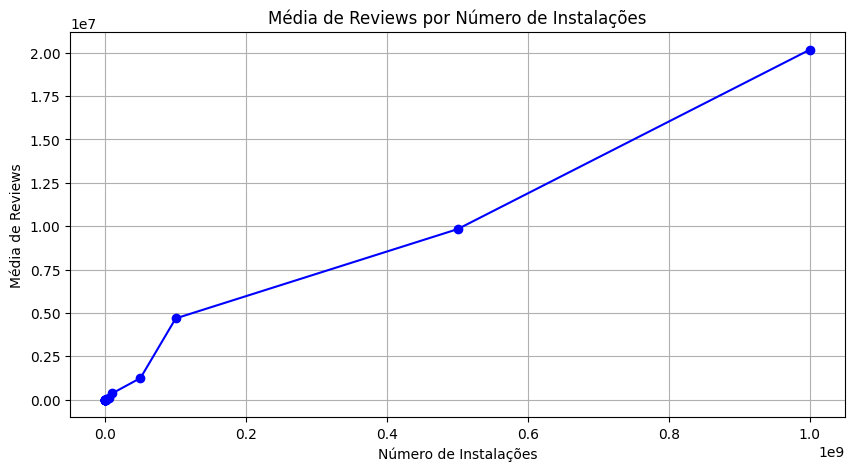

In [12]:
installs_reviews = data.groupby('Installs')['Reviews'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(installs_reviews['Installs'], installs_reviews['Reviews'], marker='o', color='b')
plt.title('Média de Reviews por Número de Instalações')
plt.xlabel('Número de Instalações')
plt.ylabel('Média de Reviews')
plt.grid(True)

In [13]:
paid_apps = data[data['Type'] == 'Paid'].head(10)
print(paid_apps)

                                                   App       Category  Rating  \
234      TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                     Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                                 Puffin Browser Pro  COMMUNICATION     4.0   
476                          Moco+ - Chat, Meet People         DATING     4.2   
477                                         Calculator         DATING     2.6   
478                                  Truth or Dare Pro         DATING     NaN   
479    Private Dating, Hide App- Blue for PrivacyHider         DATING     NaN   
480                               Ad Blocker for SayHi         DATING     NaN   
481  AMBW Dating App: Asian Men Black Women Interra...         DATING     3.5   
571                          Moco+ - Chat, Meet People         DATING     4.2   

     Reviews                Size  Installs  Type  Price Content Rating  \
234    11442                6.8M  

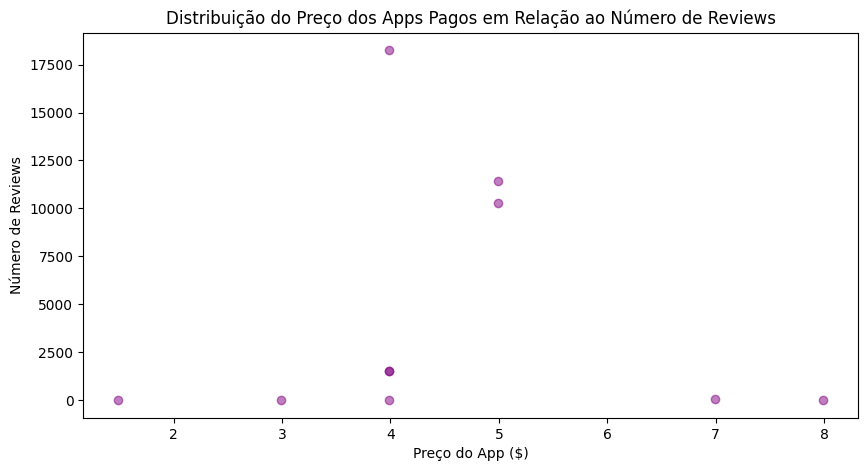

In [14]:
paid_apps = data[data['Type'] == 'Paid'].head(10)
plt.figure(figsize=(10, 5))
plt.scatter(paid_apps['Price'], paid_apps['Reviews'], alpha=0.5, color='purple')
plt.title('Distribuição do Preço dos Apps Pagos em Relação ao Número de Reviews')
plt.xlabel('Preço do App ($)')
plt.ylabel('Número de Reviews')
plt.show()